**Exercise 1.10**

Here is an experiment that illustrates the difference between a single bin and muliples bins. Run a computer 
simulation for flipping 1000 far coins. Flip each coin independently 10 times. Let is focus on 3 coins as follows: 
$c_{1}$ is thefirst coin flipped; $c_{rand}$ is a coin you choose at random; $c_{min}$ is the coin that had the 
minimum frequency of heads (pick the earlier one in case of a tie). Let $v_{1}$, $v_{rand}$ and $v_{min}$ be the
fraction of heads you obtain for the respective three coins.

**a.**
What is $\mu$ for the three coins selected?

**b.**
Repeat this entire experiment a large number of times (100,000 runs of the entire experiment) to get several instances
of $v_{1}$, $v_{rand}$ and $v_{min}$. Notice that which coins end up being $c_{rand}$ and $c_{min}$ may differ from
one run to another.

**c.**
Using b., plot estimates for $$P[|v-\mu|>\epsilon],$$ together with the Hoeffding bound $2e^{-2\epsilon^{2}N}$ on the
same graph.

**d.**
Which coins obey the Hoeffding bound, and which ones do not? Explain why.

**e.**
Relate part d. to the multiple bins in the figure 1.10.

**Answers:**

**a.**

In [1]:
#Libraries
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import math
from sklearn.preprocessing import normalize
from functools import partial

In [2]:
# Lanzar las 1000 monedas 10 veces
flips = np.random.binomial(1, 0.5, (1000, 10))

# Obtener los resultados de cada moneda
coin1 = flips[0]
coin2 = flips[np.random.choice(1000)]
coin3 = flips[np.argmin(np.sum(flips, axis=1))]

# Calcular las fracciones de caras para cada moneda
f1 = np.mean(coin1)
f2 = np.mean(coin2)
f3 = np.mean(coin3)

print("Fracción de caras para cada moneda:")
print("Coin 1:", f1)
print("Coin 2:", f2)
print("Coin 3:", f3)

Fracción de caras para cada moneda:
Coin 1: 0.6
Coin 2: 0.6
Coin 3: 0.0


**b.**

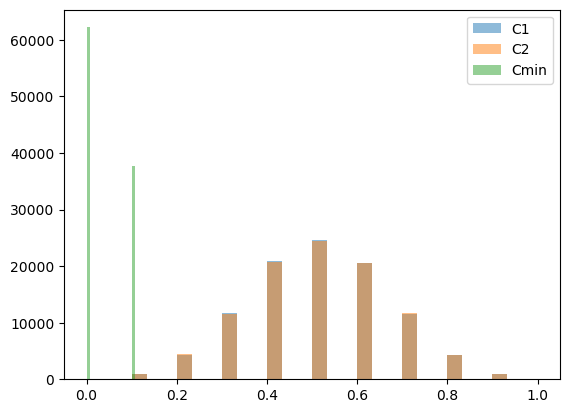

In [3]:
import matplotlib.pyplot as plt

# Repetir el experimento 100000 veces
n_trials = 100000 #se define la variable n_trials con el número de veces que se va a repetir el experimento.
results = np.zeros((n_trials, 3)) #Se crea un array de numpy llamado results que tendrá n_trials filas y 3 columnas. 
#Esta matriz se usará para almacenar los resultados de cada repetición del experimento.

for i in range(n_trials):#Se inicia un bucle for que se ejecutará n_trials veces.

    flips = np.random.binomial(1, 0.5, (1000, 10))#se generan aleatoriamente 1000 series de 10 lanzamientos de monedas
    coin1 = flips[0] #e define la variable coin1 como la primera serie de lanzamientos.
    coin2 = flips[np.random.choice(1000)] #se elige aleatoriamente una serie de lanzamientos de moneda y se define como coin2.
    coin3 = flips[np.argmin(np.sum(flips, axis=1))] #se busca la serie de lanzamientos de moneda con la menor cantidad de caras y se define como coin3.
    results[i] = [np.mean(coin1), np.mean(coin2), np.mean(coin3)] #se calcula la fracción de caras para cada una 
    #de las tres series de lanzamientos y se almacenan en la i-ésima fila de la matriz results.

# Graficar los histogramas de las distribuciones
plt.hist(results[:, 0], bins=30, alpha=0.5, label='C1')
plt.hist(results[:, 1], bins=30, alpha=0.5, label='C2')
plt.hist(results[:, 2], bins=30, alpha=0.5, label='Cmin')
plt.legend(loc='upper right')
plt.show()

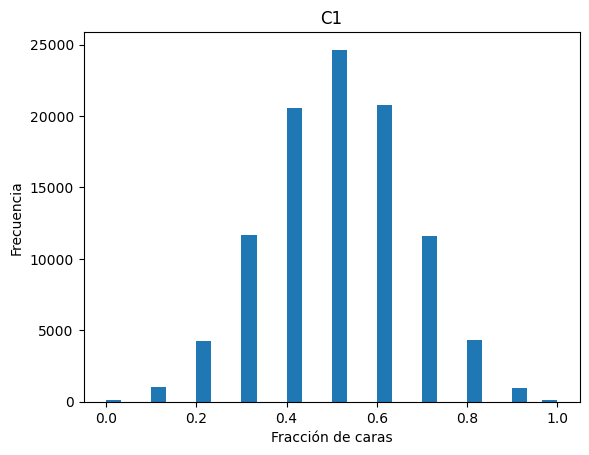

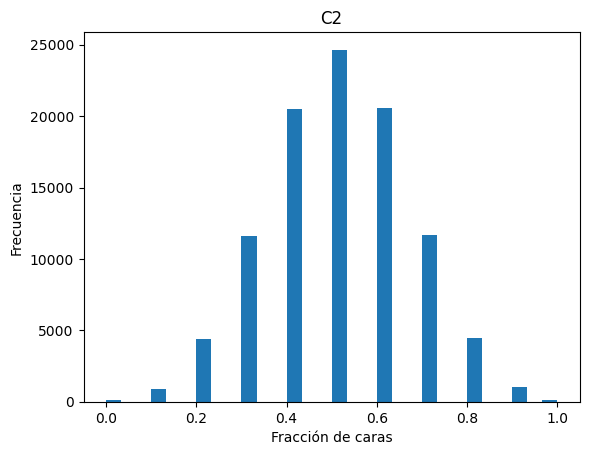

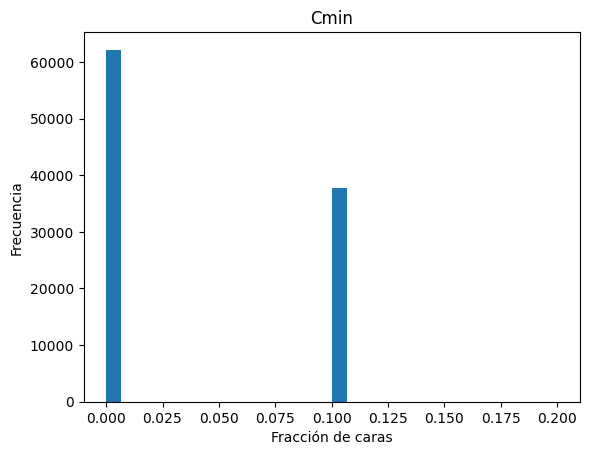

In [4]:
import matplotlib.pyplot as plt

# Repetir el experimento 100000 veces
n_trials = 100000
results = np.zeros((n_trials, 3))
for i in range(n_trials):
    flips = np.random.binomial(1, 0.5, (1000, 10))
    coin1 = flips[0]
    coin2 = flips[np.random.choice(1000)]
    coin3 = flips[np.argmin(np.sum(flips, axis=1))]
    results[i] = [np.mean(coin1), np.mean(coin2), np.mean(coin3)]

# Graficar el histograma de El
plt.hist(results[:, 0], bins=30)
plt.title('C1')
plt.xlabel('Fracción de caras')
plt.ylabel('Frecuencia')
plt.show()

# Graficar el histograma de Mrand
plt.hist(results[:, 1], bins=30)
plt.title('C2')
plt.xlabel('Fracción de caras')
plt.ylabel('Frecuencia')
plt.show()

# Graficar el histograma de Cmin
plt.hist(results[:, 2], bins=30)
plt.title('Cmin')
plt.xlabel('Fracción de caras')
plt.ylabel('Frecuencia')
plt.show()

**c.**

In [5]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import math
from sklearn.preprocessing import normalize
from functools import partial

%matplotlib inline

#target = -1 + 2*x1 + 2*x2 #np.array([2,2,-1])
df = pd.DataFrame({'x1':[0,1,0,-0.5,-1,2,1,3,0.5,-1,0,-2,-3,1,2,-4,-3,3,-0.5,-2],
                   'x2':[0,1,1,0,-1,4,-1,-5,-2,1,3,0,-1,6,8,2,3,10,2,1], 
                   'y':[1,1,1,1,1,1,1,1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1]})
df['x0'] = 1
df = df[['x0','x1', 'x2', 'y']]

def perceptron(points, dim, max_it=100, use_adaline=False, 
               eta = 1, randomize=False, print_out = True):
    w = np.zeros(dim+1)
    xs, ys = points[:,:dim+1], points[:,dim+1]
    num_points = points.shape[0]
    for it in range(max_it):
        correctly_predicted_ids=  set()
        idxs = np.arange(num_points)
        if randomize:
            idxs = np.random.choice(np.arange(num_points), num_points, replace=False)
        for idx in idxs:
            x, y = xs[idx], ys[idx]
            st = np.dot(w.T, x)
            prod = st*y #np.dot(w.T, x)*y
            if prod < -100: #avoid out of bound error
                st = -100
            threshold = 1 if use_adaline else 0
            st = st if use_adaline else 0
            if prod <= threshold:
                w = w + eta *(y-st)*x
                break #PLA picks one example at each iteration
            else:
                correctly_predicted_ids.add(idx)
        if len(correctly_predicted_ids) == num_points:
            break
    
    c = 0
    for x, y in zip(xs, ys):
        prod = np.dot(w.T, x)*y
        if prod > 0:
            c +=1
    w = w/w[-1]
    if print_out:
        print('final correctness: ', c, '. Total iteration: ', it)
        print('final normalized w:', w)
    return w, it
    
def flip_coins(total_coins):
    """Flip all coins once, return their head/tail status
    """
    
    hts = np.zeros(total_coins) #head: 1, tail: 0
    probs = np.random.uniform(size=total_coins)
    hts[probs > 0.5] = 1
    return hts

def run_once(total_coins, total_flips, print_freq = False):
    v1, vrand, vmin = None, None, None
    crand = np.random.choice(total_coins)
    hts_sum = np.zeros(total_coins) # store the sum of heads in total_flips
    
    for flip in range(total_flips):
        hts_sum = hts_sum + flip_coins(total_coins)
    
    hts_freq = hts_sum/total_flips
    
    v1 = hts_freq[0]
    vrand = hts_freq[crand]
    cmin = np.argmin(hts_sum)
    vmin = hts_freq[cmin]
    
    if print_freq:
        print('Frequency of first coin: {}'.format(v1))
        print('Frequency of a random coin: id({})-freq({})'.format(crand, vrand))
        print('Frequency of the coin with minimum frequency: id({})-freq({})'.format(cmin, vmin))
    return v1,vrand,vmin

def hoeffding_bound(epsilon, n):
    return 2.0*np.exp(-2.0*n*epsilon**2)


def generate_random_numbers01(N, dim, num_grid_points):
    random_ints = np.random.randint(num_grid_points, size=(N, dim))
    init_lb = 0
    return (random_ints - init_lb)/(num_grid_points - 1 - init_lb)

def generate_random_numbers(N, dim, num_grid_points, lb, ub):
    zero_to_one_points = generate_random_numbers01(N, dim, num_grid_points)
    res = lb + (ub - lb)*zero_to_one_points
    return res

def generate_random_coeffs(dim):
    rn = generate_random_numbers(1, dim, 1000, -10, 10)
    return rn

def true_f(x, coeffs):
    return coeffs.flatten()[0] + np.dot(coeffs.flatten()[1:], x.flatten())

def generate_two_classes(N, dim, true_func, rn_func):
    cls1, cls2 = [], []
    while True:
        rn = rn_func(1, dim).flatten()
        if true_func(rn) > 0 and len(cls1) < N:
            cls1.append(rn)
        elif true_func(rn) < 0 and len(cls2) < N:
            cls2.append(rn)
        if len(cls1) == N and len(cls2) == N:
            break
    return np.asarray(cls1), np.asarray(cls2)    

def generate_df(N, dim,true_func, rn_func):
    cls1, cls2 = generate_two_classes(N/2, dim, true_func, rn_func)
    cols = ['x' + str(i) for i in range(1, dim+1)]
    df1 = pd.DataFrame(cls1, columns=cols)
    df1['y'] = 1
    df2 = pd.DataFrame(cls2, columns=cols)
    df2['y'] = -1
    df = pd.concat([df1, df2])
    df['x0'] = 1
    df = df[['x0'] + cols + ['y']]
    return df

def plot_data(x1, df, norm_coeffs, norm_g, lb, ub):
        figsize = plt.figaspect(1)
        f, ax = plt.subplots(1, 1, figsize=figsize)
        cls1_df = df.loc[df['y']==1]
        cls2_df = df.loc[df['y']==-1]
        line = ax.plot(x1, -(norm_coeffs[0]+norm_coeffs[1]*x1), label='True Function')
        pluses = ax.scatter(cls1_df[['x1']].values, cls1_df[['x2']].values, marker='+', c= 'r', label='+1 labels')
        minuses = ax.scatter(cls2_df[['x1']].values, cls2_df[['x2']].values, marker=r'$-$', c= 'b', label='-1 labels')
        if norm_g is not None:
            hypothesis = ax.plot(x1, -(norm_g[0]+norm_g[1]*x1), c = 'r', label='Final Hypothesis')

        ax.set_ylabel(r"$x_2$", fontsize=11)
        ax.set_xlabel(r"$x_1$", fontsize=11)
        ax.set_title('Data set size = %s'%N, fontsize=9)
        ax.axis('tight')
        legend_x = 2.0
        legend_y = 0.5
        ax.legend(['True Function', 'Final Hypothesis', 
                   '+1 labels', '-1 labels', ], 
                  loc='center right', bbox_to_anchor=(legend_x, legend_y))
        #ax.legend(handles=[pluses, minuses], fontsize=9)
        ax.set_ylim(bottom=lb, top=ub)
        plt.show()
        
def run_perceptron_experiment(N, dim, lb, ub, num_grid_points, coeff_lb, coeff_ub, 
                              eta, maxit, use_adaline=False, randomize=False,
                              show_plot=True, test_N = 10000):
    
    rns = generate_random_numbers(N, dim, num_grid_points, lb, ub)
    rn_func = partial(generate_random_numbers, num_grid_points = num_grid_points, lb = lb, ub = ub)
    coeffs = generate_random_numbers(1, dim+1, num_grid_points, coeff_lb, coeff_ub)
    norm_coeffs = coeffs.flatten()/coeffs.flatten()[-1]
    true_func = partial(true_f, coeffs = norm_coeffs)
    
    df = generate_df(N, dim, true_func, rn_func)
    test_df = generate_df(test_N, dim, true_func, rn_func)
    
    x1 = np.arange(lb, ub, 0.01)
    norm_g, num_its = perceptron(df.values, dim, maxit, use_adaline, 
                                 eta, randomize, show_plot)
    
    if show_plot:
        print('True coeffs: ', norm_coeffs)
        plot_data(x1, df, norm_coeffs, norm_g, lb, ub)
    return num_its, norm_g, test_df


# Exercise 1.10 (c)
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import math
from sklearn.preprocessing import normalize
from functools import partial

%matplotlib inline

#target = -1 + 2*x1 + 2*x2 #np.array([2,2,-1])
df = pd.DataFrame({'x1':[0,1,0,-0.5,-1,2,1,3,0.5,-1,0,-2,-3,1,2,-4,-3,3,-0.5,-2],
                   'x2':[0,1,1,0,-1,4,-1,-5,-2,1,3,0,-1,6,8,2,3,10,2,1], 
                   'y':[1,1,1,1,1,1,1,1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1]})
df['x0'] = 1
df = df[['x0','x1', 'x2', 'y']]

def perceptron(points, dim, max_it=100, use_adaline=False, 
               eta = 1, randomize=False, print_out = True):
    w = np.zeros(dim+1)
    xs, ys = points[:,:dim+1], points[:,dim+1]
    num_points = points.shape[0]
    for it in range(max_it):
        correctly_predicted_ids=  set()
        idxs = np.arange(num_points)
        if randomize:
            idxs = np.random.choice(np.arange(num_points), num_points, replace=False)
        for idx in idxs:
            x, y = xs[idx], ys[idx]
            st = np.dot(w.T, x)
            prod = st*y #np.dot(w.T, x)*y
            if prod < -100: #avoid out of bound error
                st = -100
            threshold = 1 if use_adaline else 0
            st = st if use_adaline else 0
            if prod <= threshold:
                w = w + eta *(y-st)*x
                break #PLA picks one example at each iteration
            else:
                correctly_predicted_ids.add(idx)
        if len(correctly_predicted_ids) == num_points:
            break
    
    c = 0
    for x, y in zip(xs, ys):
        prod = np.dot(w.T, x)*y
        if prod > 0:
            c +=1
    w = w/w[-1]
    if print_out:
        print('final correctness: ', c, '. Total iteration: ', it)
        print('final normalized w:', w)
    return w, it
    
def flip_coins(total_coins):
    """Flip all coins once, return their head/tail status
    """
    
    hts = np.zeros(total_coins) #head: 1, tail: 0
    probs = np.random.uniform(size=total_coins)
    hts[probs > 0.5] = 1
    return hts

def run_once(total_coins, total_flips, print_freq = False):
    v1, vrand, vmin = None, None, None
    crand = np.random.choice(total_coins)
    hts_sum = np.zeros(total_coins) # store the sum of heads in total_flips
    
    for flip in range(total_flips):
        hts_sum = hts_sum + flip_coins(total_coins)
    
    hts_freq = hts_sum/total_flips
    
    v1 = hts_freq[0]
    vrand = hts_freq[crand]
    cmin = np.argmin(hts_sum)
    vmin = hts_freq[cmin]
    
    if print_freq:
        print('Frequency of first coin: {}'.format(v1))
        print('Frequency of a random coin: id({})-freq({})'.format(crand, vrand))
        print('Frequency of the coin with minimum frequency: id({})-freq({})'.format(cmin, vmin))
    return v1,vrand,vmin

def hoeffding_bound(epsilon, n):
    return 2.0*np.exp(-2.0*n*epsilon**2)


def generate_random_numbers01(N, dim, num_grid_points):
    random_ints = np.random.randint(num_grid_points, size=(N, dim))
    init_lb = 0
    return (random_ints - init_lb)/(num_grid_points - 1 - init_lb)

def generate_random_numbers(N, dim, num_grid_points, lb, ub):
    zero_to_one_points = generate_random_numbers01(N, dim, num_grid_points)
    res = lb + (ub - lb)*zero_to_one_points
    return res

def generate_random_coeffs(dim):
    rn = generate_random_numbers(1, dim, 1000, -10, 10)
    return rn

def true_f(x, coeffs):
    return coeffs.flatten()[0] + np.dot(coeffs.flatten()[1:], x.flatten())

def generate_two_classes(N, dim, true_func, rn_func):
    cls1, cls2 = [], []
    while True:
        rn = rn_func(1, dim).flatten()
        if true_func(rn) > 0 and len(cls1) < N:
            cls1.append(rn)
        elif true_func(rn) < 0 and len(cls2) < N:
            cls2.append(rn)
        if len(cls1) == N and len(cls2) == N:
            break
    return np.asarray(cls1), np.asarray(cls2)    

def generate_df(N, dim,true_func, rn_func):
    cls1, cls2 = generate_two_classes(N/2, dim, true_func, rn_func)
    cols = ['x' + str(i) for i in range(1, dim+1)]
    df1 = pd.DataFrame(cls1, columns=cols)
    df1['y'] = 1
    df2 = pd.DataFrame(cls2, columns=cols)
    df2['y'] = -1
    df = pd.concat([df1, df2])
    df['x0'] = 1
    df = df[['x0'] + cols + ['y']]
    return df

def plot_data(x1, df, norm_coeffs, norm_g, lb, ub):
        figsize = plt.figaspect(1)
        f, ax = plt.subplots(1, 1, figsize=figsize)
        cls1_df = df.loc[df['y']==1]
        cls2_df = df.loc[df['y']==-1]
        line = ax.plot(x1, -(norm_coeffs[0]+norm_coeffs[1]*x1), label='True Function')
        pluses = ax.scatter(cls1_df[['x1']].values, cls1_df[['x2']].values, marker='+', c= 'r', label='+1 labels')
        minuses = ax.scatter(cls2_df[['x1']].values, cls2_df[['x2']].values, marker=r'$-$', c= 'b', label='-1 labels')
        if norm_g is not None:
            hypothesis = ax.plot(x1, -(norm_g[0]+norm_g[1]*x1), c = 'r', label='Final Hypothesis')

        ax.set_ylabel(r"$x_2$", fontsize=11)
        ax.set_xlabel(r"$x_1$", fontsize=11)
        ax.set_title('Data set size = %s'%N, fontsize=9)
        ax.axis('tight')
        legend_x = 2.0
        legend_y = 0.5
        ax.legend(['True Function', 'Final Hypothesis', 
                   '+1 labels', '-1 labels', ], 
                  loc='center right', bbox_to_anchor=(legend_x, legend_y))
        #ax.legend(handles=[pluses, minuses], fontsize=9)
        ax.set_ylim(bottom=lb, top=ub)
        plt.show()
        
def run_perceptron_experiment(N, dim, lb, ub, num_grid_points, coeff_lb, coeff_ub, 
                              eta, maxit, use_adaline=False, randomize=False,
                              show_plot=True, test_N = 10000):
    
    rns = generate_random_numbers(N, dim, num_grid_points, lb, ub)
    rn_func = partial(generate_random_numbers, num_grid_points = num_grid_points, lb = lb, ub = ub)
    coeffs = generate_random_numbers(1, dim+1, num_grid_points, coeff_lb, coeff_ub)
    norm_coeffs = coeffs.flatten()/coeffs.flatten()[-1]
    true_func = partial(true_f, coeffs = norm_coeffs)
    
    df = generate_df(N, dim, true_func, rn_func)
    test_df = generate_df(test_N, dim, true_func, rn_func)
    
    x1 = np.arange(lb, ub, 0.01)
    norm_g, num_its = perceptron(df.values, dim, maxit, use_adaline, 
                                 eta, randomize, show_plot)
    
    if show_plot:
        print('True coeffs: ', norm_coeffs)
        plot_data(x1, df, norm_coeffs, norm_g, lb, ub)
    return num_its, norm_g, test_df


**continuación ejercicio c.**

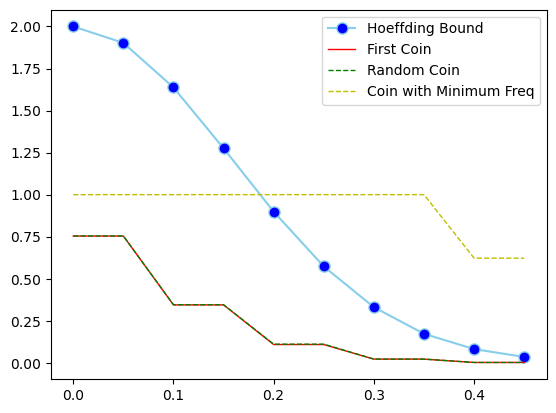

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def flip_coins(total_coins):
    """Flip all coins once, return their head/tail status."""
    hts = np.zeros(total_coins)  # head: 1, tail: 0
    probs = np.random.uniform(size=total_coins)
    hts[probs > 0.5] = 1
    return hts

def run_once(total_coins, total_flips):
    v1, vrand, vmin = None, None, None
    crand = np.random.choice(total_coins)
    hts_sum = np.zeros(total_coins)  # store the sum of heads in total_flips

    for _ in range(total_flips):
        hts_sum = hts_sum + flip_coins(total_coins)

    hts_freq = hts_sum / total_flips

    v1 = hts_freq[0]
    vrand = hts_freq[crand]
    cmin = np.argmin(hts_sum)
    vmin = hts_freq[cmin]

    return v1, vrand, vmin

total_flips = 10
v1s, vrands, vmins = [], [], []
total_runs = 100000
eps = np.arange(0.0, 0.5, 0.05)
bounds = hoeffding_bound(eps, total_flips)

for _ in range(total_runs):
    v1, vrand, vmin = run_once(1000, total_flips)
    v1s.append(v1)
    vrands.append(vrand)
    vmins.append(vmin)

v1s, vrands, vmins = np.array(v1s), np.array(vrands), np.array(vmins)
v1d = np.abs(v1s - 0.5)
vrandd = np.abs(vrands - 0.5)
vmind = np.abs(vmins - 0.5)

p1, prand, pmin = np.zeros(len(eps)), np.zeros(len(eps)), np.zeros(len(eps))

for idx in range(eps.shape[0]):
    ep = eps[idx]
    p1[idx] = np.sum(v1d > ep) / total_runs
    prand[idx] = np.sum(vrandd > ep) / total_runs
    pmin[idx] = np.sum(vmind > ep) / total_runs

plt.plot(eps, bounds, marker='o', markerfacecolor='blue', markersize=8, color='skyblue', label='Hoeffding Bound')
plt.plot(eps, p1, marker='', color='r', linewidth=1, label='First Coin')
plt.plot(eps, prand, marker='', color='g', linewidth=1, linestyle='dashed', label='Random Coin')
plt.plot(eps, pmin, marker='', color='y', linewidth=1, linestyle='dashed', label='Coin with Minimum Freq')
plt.legend()
plt.show()

**d.**

Las primeras y las monedas aleatorias siguen el límite de Hoeffding. La moneda con la frecuencia mínima no cumple con 
el límite de Hoeffding. Esto se debe a que para las primeras dos monedas, las monedas se eligieron antes del 
experimento. Mientras que para la última, tenemos que lanzar todas las monedas primero y usar los datos para 
determinar cuál es la moneda con la frecuencia mínima de caras. Esto viola la condición de desigualdad de Hoeffding 
que establece que la hipótesis ℎ se ha fijado antes de que se obtengan las muestras.

**e.**

Cuando elegimos la moneda con la frecuencia mínima de caras, es como elegir la cesta entre 1000 cestas 
(nuestro espacio de hipótesis). Pero elegimos la cesta después de terminar de tomar muestras de los datos. Esto se 
asemeja a un algoritmo de aprendizaje para la hipótesis final. Las otras dos monedas se eligieron antes de tomar las 
muestras, lo cual es elegir la cesta de antemano.